# BLU8002 - IA
Objetivo
Criar modelo capaz de diferenciar imagens de árvores e casas.
Aluno: Klaus Dieter Kupper
Prof. Mauri Ferrandin

# Parte I - baixando um arquivo .zip do GoogleDrive e descompactando no espaço (disco) do colab. 

Para fazer o download vamos usar um programar chamado gdown que precisa ser instalado no ambiente. No colab, as instruções precedidas por ! são executadas como comandos do sistema operacional (no caso do colab é Linux).

In [1]:
# install gdown (to easy download files on public shares no googledrive)
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Uma vez instalado o gdown, usaremos ele para fazer downloado do arquivo exemplo.zip de um compartilhamento público (compartilhamento acessível apenas com o link) do GoogleDrive.

então basta substituir na URL abaixo que será usada pelo gdown o texto id_do_compartilhamento pelo id obtido: 

gdown https://drive.google.com/uc?id=id_do_compartilhamento

Abaixo o uso do gdown para este arquivo (exemplo.zip) com alguns comandos adicionais comentados no texto. Caso julgue interessante, separe cada comando em uma caixa para executá-lo em separado e ver o resultado que ele produz:

In [2]:
# remover o Dataset_mod.zip caso já exista
!rm -rfv Dataset_mod.zip;

# remover o diretório gerado ao descompactar o Dataset_mod.zip caso já exista
!rm -rfv Dataset_mod/;

# baixar o arquivo do GoogleDrive usando o gdown
!gdown https://drive.google.com/uc?id=1KOE_X7hPZvy9vZLN7e0pqwkbidruLTeN

# descompactar o arquivo Dataset_mod.zip
!unzip -q Dataset_mod.zip

# listar os arquivos e diretórios
!ls -ltr


Downloading...
From: https://drive.google.com/uc?id=1KOE_X7hPZvy9vZLN7e0pqwkbidruLTeN
To: /content/Dataset_mod.zip
100% 9.64M/9.64M [00:00<00:00, 200MB/s]
total 9420
drwxr-xr-x 5 root root    4096 Apr 19 10:55 Dataset_mod
drwxr-xr-x 1 root root    4096 Apr 21 13:38 sample_data
-rw-r--r-- 1 root root 9637129 Apr 24 17:45 Dataset_mod.zip



# Parte II: Lendo os arquivos de entrada usando o ImageDataGenerator

A classe ImageDataGenerator que é parte da API do Keras é um componente de grande utilidade para carregar e fazer pré-processamento das imagens para uma rede neural programada com o Keras.

Além da função de ler os arquivos contendo as imagens com base em uma organização de diretórios, ele possuí outras funcionalidades de pré-processamento, como redimensionamento, rotação, zoom, resampling, etc. Para mais detalhes visite: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator.

Além do componente ImageDataGenerator, existem outros componentes e métodos para ler os dados de imagens e transformá-las em matrizes no formato necessário para usá-las em uma rede CNN. Um exemplo de outro componente é o [tf.keras.preprocessing.image_dataset_from_directory](https://keras.io/api/preprocessing/image/) entre outros.

Para usar o ImageDataGenerator, é preciso criar a seguinte estrutura de diretórios:


```
Dataset_mod/
├── test
│   ├── tree
│   │   ├── tree183.bmp
│   │   ├── tree184.bmp
│   │   ├── tree185.bmp
│   │   └── tree272.bmp
│   │   └── ...
│   └── house
│       ├── house333.bmp
│       ├── house 334.bmp
│       ├── house335.bmp
│       └── house418.bmp
│       └── ...
├── training_set
│   ├── tree
│   │   ├── tree_001.bmp
│   │   ├── tree_003.bmp
│   │   ├── tree_004.bmp
│   │   └── ...
│   └── house
│       ├── house10.jpg
│       ├── house11.jpg
│       ├── house14.jpg
│       └── ...
└── valid_set
    ├── tree
    │   ├── tree_002.bmp
    │   ├── tree_019.bmp
    │   ├── tree_020.bmp
    │   └── ...
    └── house
        ├── house12.jpg
        ├── house13.jpg
        ├── house2.jpg
        └── ...

```

Estando as imagens de cada grupo separadas (train, validation, test), basta usar o componente para ler e pré-processar as imagens de cada grupo indicando o diretório em que elas se encontram.



In [3]:
from keras.preprocessing.image import ImageDataGenerator

# definindo o tamanho (tam x tam) que usaremos para as imagens na CNN, o componente já fará o redimensionamento delas.
tam = 100

# Instanciando um objeto para ler os exemplos de treinamento. Para os exemplos de treinamento, serão feitas algumas operações com as imagens.
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

# Usando o objeto gerador_treinamento criado, faremos a carga de todas as imagens do diretório de treinamento. Os subdiretórios indicarão a que classe dada imagem pertence.
base_treinamento = gerador_treinamento.flow_from_directory('Dataset_mod/train',
                                                           target_size = (tam,tam),                                                           
                                                           batch_size=1000, 
                                                           class_mode = 'binary')


# Instanciando um objeto para ler os exemplos de validação e teste. Neste caso faremos apenas a normalização dos valores pois queremos que a rede reconheça as imagens sem pré-processá-las.
gerador_teste = ImageDataGenerator(rescale = 1./255)

# Fazendo a carga das imagens de validação
base_validacao = gerador_teste.flow_from_directory('Dataset_mod/validation',
                                                           target_size = (tam,tam),  
                                                            batch_size=1000,                                                          
                                                           class_mode = 'binary')
# Fazendo a carga das imagens de teste
base_teste = gerador_teste.flow_from_directory('Dataset_mod/test',
                                                           target_size = (tam,tam),  
                                                            batch_size=1000,                                                         
                                                           class_mode = 'binary')


Found 523 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 282 images belonging to 2 classes.


# Parte III: definir a rede, treinar a rede, avaliar resultados

Para estas etapas, complete os blocos abaixo.

In [4]:
# definir a CNN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# definir as camadas
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(tam, tam, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# compilar treinar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# exemplo de como indicar os dados de entrada obtidos pelo ImageDataGenerator para treinamento e validação do modelo
hist = model.fit(base_treinamento, epochs=200, validation_data=base_validacao)

test_loss, test_accuracy = model.evaluate(base_teste)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/200
1/1 [==============================] - 17s 17s/step - loss: 0.7277 - accuracy: 0.4398 - val_loss: 3.4340 - val_accuracy: 0.6500
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 3.8593 - accuracy: 0.5717 - val_loss: 0.8123 - val_accuracy: 0.6500
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 0.9415 - accuracy: 0.5698 - val_loss: 1.0920 - val_accuracy: 0.3500
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 1.0015 - accuracy: 0.4359 - val_loss: 0.9519 - val_accuracy: 0.3500
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 0.9319 - accuracy: 0.4417 - val_loss: 0.8179 - val_accuracy: 0.3500
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.8054 - accuracy: 0.4283 - val_loss: 0.7384 - val_accuracy: 0.3500
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.7278 - accuracy: 0.5067 - val_loss: 0.7066 - val_accuracy: 0.3500
Epoch 8/200
1/1 [===============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


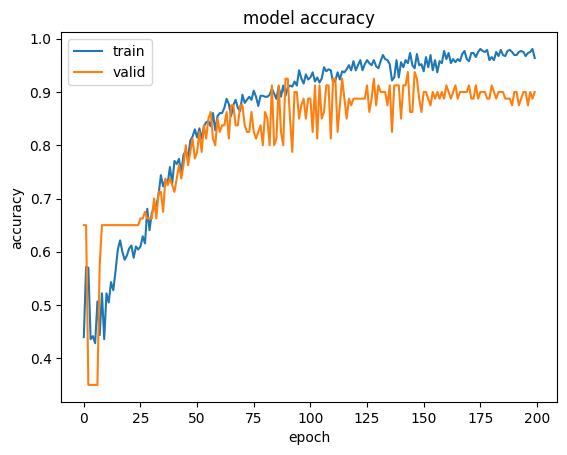

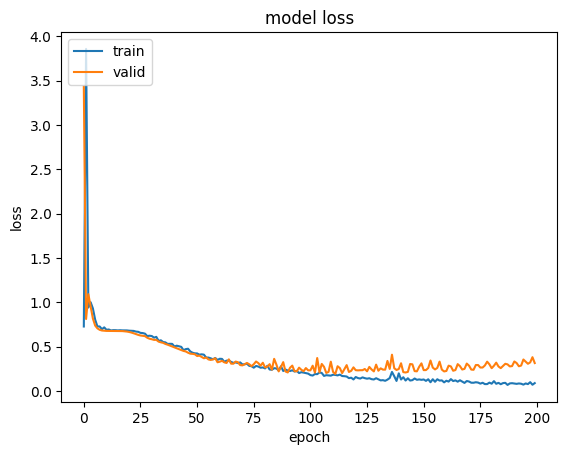

In [6]:
# plotar as curvas - é preciso ajustar as séries de acordo com as métricas e loss function definidas na compilação do modelo
import matplotlib.pyplot as plt

# para ver as variáveis disponíveis no history
print(hist.history.keys())


# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [7]:
# testando o desempenho do modelo sobre os exemplos de teste
score = model.evaluate(base_teste, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.1819562464952469
Test accuracy: 0.9432623982429504


(282, 100, 100, 3)
(282,)
[[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [

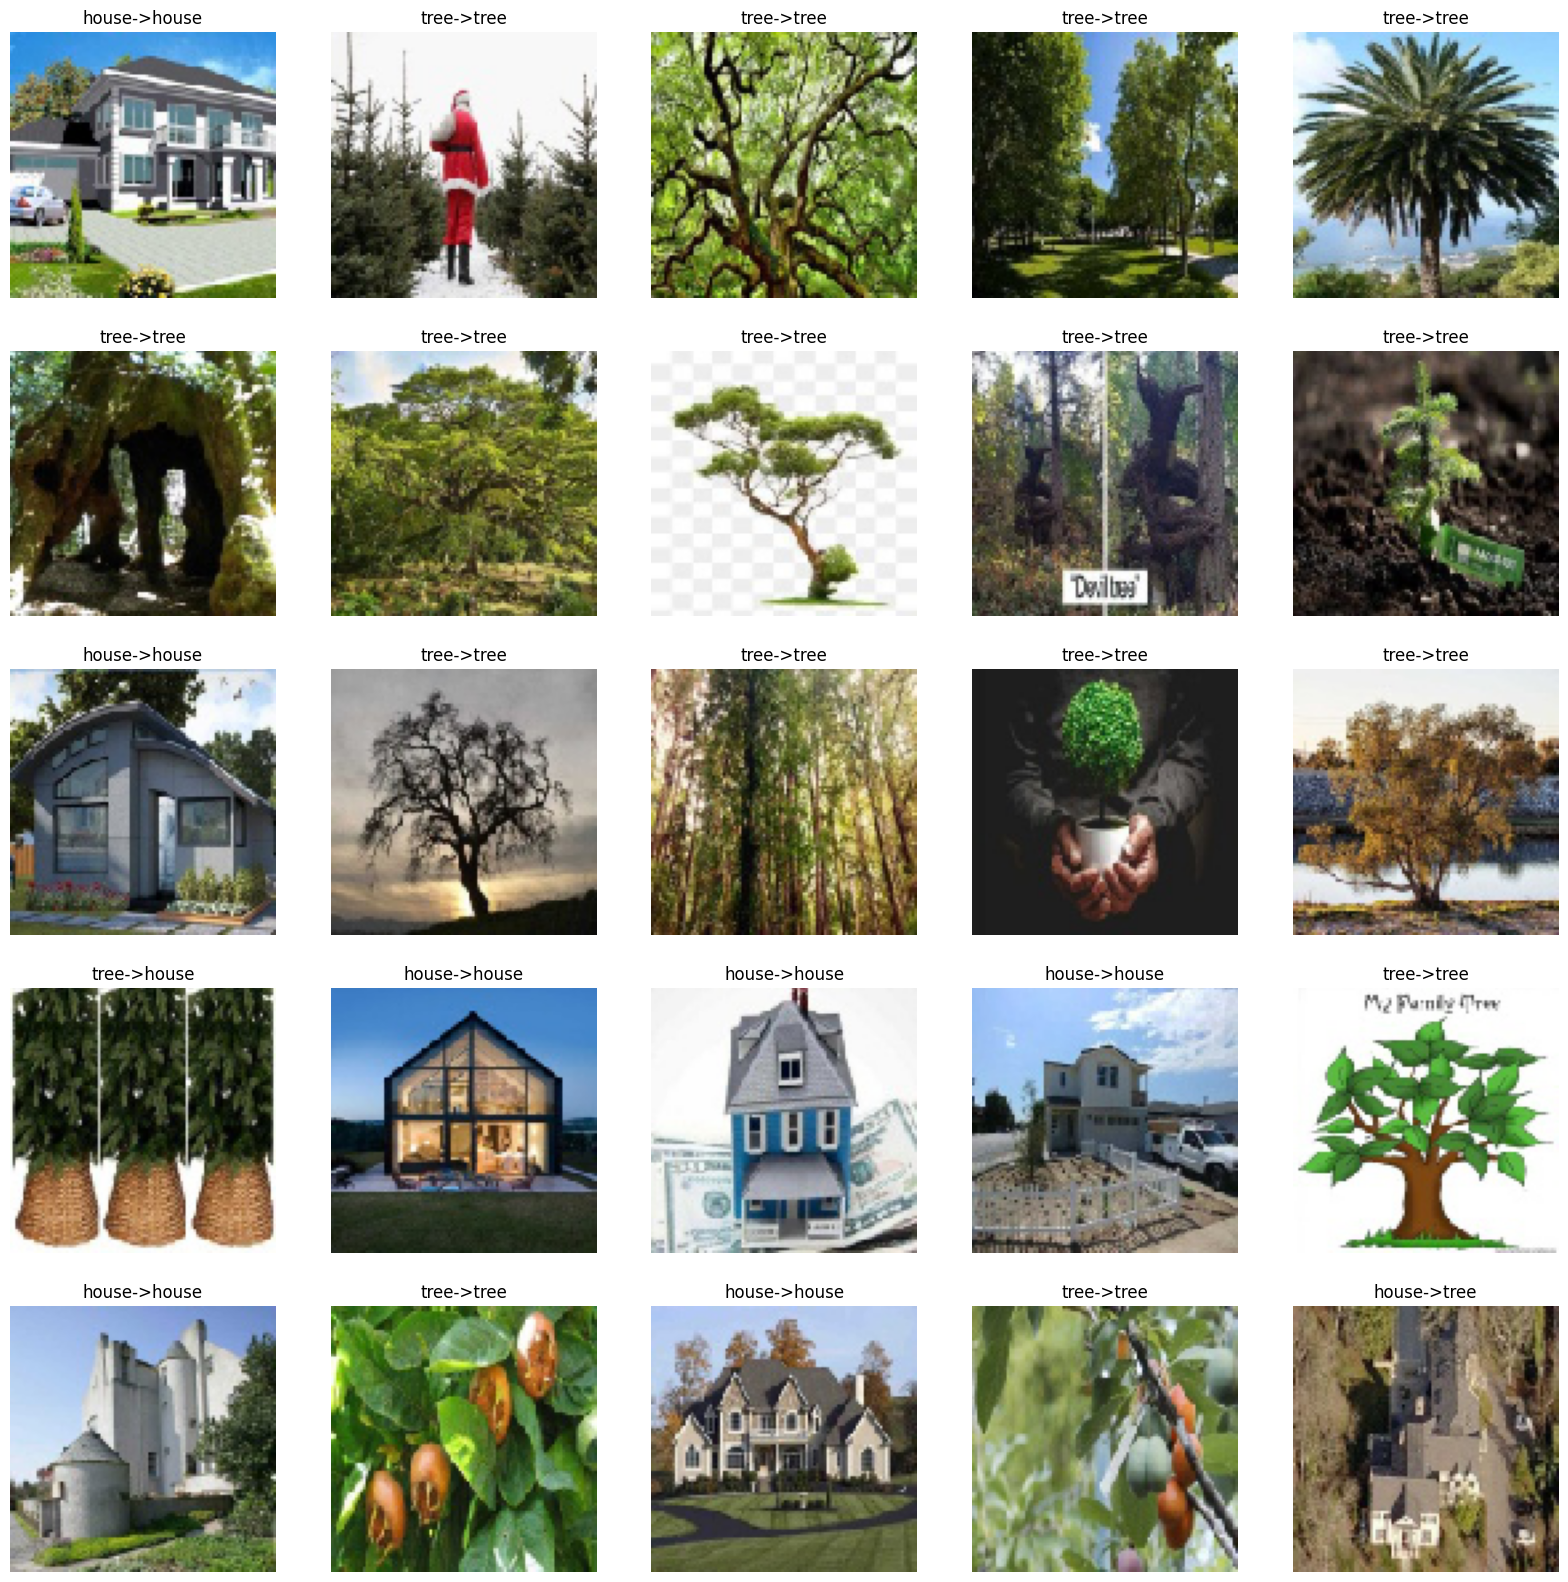

In [8]:
images, labels = next(base_teste)
print(images.shape)
print(labels.shape)


import matplotlib.pyplot as plt
import numpy as np


predictions = (model.predict(base_teste, verbose=0) > 0.5).astype(int)


plt.figure(figsize=(20, 20))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(list(base_teste.class_indices.keys())[labels[i].astype(int)] + "->" + list(base_teste.class_indices.keys())[predictions[i,0].astype(int)])    
    plt.axis("off")

print(np.column_stack((labels, predictions)))

